<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODSOFT INTERNSHIP**

###**TASK - 1 : Titanic Survival Prediction**

Author : Rooban

Domain : Data Science

Batch : April-24

### **AIM**

 * Motto of the project is to build a machine learning model to predict the passenger survival and  I have used the Titanic dataset downloaded from the Kaggle website as per Codsoft instructions for this project.
 * In this project, I have implemented Logistic Regression with Python and Scikit-Learn. I build a model to predict whether the passenger survived or not by training a binary classification model using Logistic Regression.
 * Accuracy of the model is calculated and established with the help of Evaluation Metrics
  





In [13]:
#Import Libraries for data processing and modelling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [7]:
# Dataset First Look
import io
titanic_df = pd.read_csv((io.BytesIO(uploaded['Titanic-Dataset.csv'])))
titanic_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
titanic_df.shape

(891, 12)

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

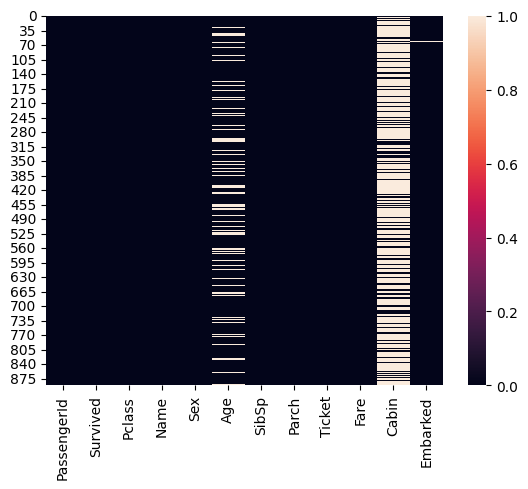

In [14]:
# Visualizing the missing values using heatmap
sns.heatmap(titanic_df.isnull())

In [21]:
ports = pd.get_dummies(titanic_df.Embarked, prefix='Embarked', dtype=int)
ports.head()

Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

In [22]:
titanic_df = titanic_df.join(ports)

In [24]:
titanic_df.drop(['Embarked'],axis=1, inplace=True)

In [25]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN           0           0           1  
1      0          PC 17599  71.2833   C85           1           0           0  
2      0  STON/O2. 3101282   7.9250   NaN           0           0           1  
3      0            113803  53.1000  C123           0           0           1  
4      0            373450   8.0500   NaN           0           0           1

In [26]:
titanic_df.Sex=titanic_df.Sex.map({'male':0,'female':1})

In [27]:
#Splitting the data
Y= titanic_df.Survived.copy()
X= titanic_df.drop(['Survived'], axis = 1)

In [28]:
# We are dropping the attributed which does not have a stronger coorelation to affect the outcome
X.drop(['Cabin','Ticket', 'Name', 'PassengerId'], axis = 1, inplace=True)

In [30]:
X.isnull().sum()

Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [31]:
# As per prior result we have null values in the Age Component, we are replacing the null values with mean
X.Age.fillna(X.Age.mean(),inplace=True)

In [32]:
# Checking any null values present
X.isnull().values.any()

False

In [35]:
#Import libraries for Model buliding
from sklearn.model_selection import train_test_split

#Spliting the data to train our model and test its accuracy
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [33]:
#Import Regression libraries for Model buliding
from sklearn.linear_model import LogisticRegression

#Initialize it to a name
model = LogisticRegression()

In [36]:
#Fitting our data to the model
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model.score(X_train,Y_train)

0.8103932584269663

In [44]:
# Predict on the model
Y_pred_test= model.predict(X_test)
Y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1])

In [45]:
#Import Metrics to Check Accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test)))

Model accuracy score: 0.7542
